MNIST via Fully Connected Deep Neural Network with 4 Hidden Layers.

In [1]:
import tensorflow as tf

In [2]:
tf.reset_default_graph()

In [3]:
#Input layer (x), hidden layers, output layer
n_inputs = 28*28 # = 784
n_hidden1 = 400
n_hidden2 = 200
n_hidden3 = 100
n_hidden4 = 50
n_outputs = 10

In [4]:
x = tf.placeholder(tf.float32, shape = (None, n_inputs), name = "x") #784-dimensional tensor that can be injected with data, images
y = tf.placeholder(tf.int64, shape = (None), name = "y") #batch_size vector of class ids

In [5]:
with tf.name_scope("layers"): #label for this part of the graph, the layers of the neural network
    hidden1 = tf.layers.dense(x, n_hidden1, name = "hidden1", activation = tf.nn.relu)
    #Creates densely connected layer of a neural network which outputs activation(input + bias)
    #Takes x (which will be fed) as input and has n_hidden1 units
    hidden2 = tf.layers.dense(hidden1, n_hidden2, name = "hidden2", activation = tf.nn.relu)
    hidden3 = tf.layers.dense(hidden2, n_hidden3, name = "hidden3", activation = tf.nn.relu)
    hidden4 = tf.layers.dense(hidden3, n_hidden4, name = "hidden4", activation = tf.nn.relu)
    logits = tf.layers.dense(hidden4, n_outputs, name = "outputs")
    #Output layer with 10 nodes taking inputs from the fourth hidden layer
    #Each layer returns an output tensor (array of outputs of each neuron)

In [6]:
#Loss function (cross-entropy)
with tf.name_scope("loss"):
    xentropy = tf.nn.sparse_softmax_cross_entropy_with_logits(labels = y, logits = logits)
    loss = tf.reduce_mean(xentropy, name = "loss")

In [7]:
learning_rate = 0.125 #Best learning rate according to my tests

with tf.name_scope("minimize"):
    optimizer = tf.train.GradientDescentOptimizer(learning_rate) #Implements gradient descent algorithm
    train_op = optimizer.minimize(loss) #Minimizes loss by updating variables (weights and threshold)

In [8]:
with tf.name_scope("accuracy"):
    correct = tf.nn.in_top_k(logits, y, 1) 
    #Says whether the targets are in the top k (1) predictions
    #tf.nn.in_top_k(predictions, targets, k)
    #Returns a Tensor of type bool
    accuracy = tf.reduce_mean(tf.cast(correct, tf.float32)) 
    #tf.reduce_mean: Computes the mean of elements across dimensions of a tensor
    #tf.cast: Casts Tensor to a new type

In [9]:
init = tf.global_variables_initializer()
saver = tf.train.Saver() #Saves model

In [10]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("data")

Extracting data\train-images-idx3-ubyte.gz
Extracting data\train-labels-idx1-ubyte.gz
Extracting data\t10k-images-idx3-ubyte.gz
Extracting data\t10k-labels-idx1-ubyte.gz


In [11]:
n_epochs = 20
batch_size = 50

In [12]:
with tf.Session() as sess:
    final_accuracy = 0
    init.run()
    for epoch in range(n_epochs):
        for step in range(mnist.train.num_examples // batch_size): # // means integer division
            x_batch, y_batch = mnist.train.next_batch(batch_size) #Batch of images and batch of labels
            sess.run(train_op, feed_dict={x: x_batch, y: y_batch}) #Applying gradient descent to batch
        acc_train = accuracy.eval(feed_dict={x: x_batch, y: y_batch}) #Accuracy score on training set
        acc_test = accuracy.eval(feed_dict={x: mnist.test.images, y: mnist.test.labels}) #Accuracy score on test set
        print("Epoch {:>2d}".format(epoch), "\tTrain accuracy {:.4f}".format(acc_train), 
                                                  "\tTest accuracy {:.4f}".format(acc_test))
        if acc_test > final_accuracy:
            final_accuracy = acc_test
            save_model = saver.save(sess, "models/my_model_final.ckpt") #Save the model with the highest accuracy
    print("\nFinal Accuracy {}".format(final_accuracy))

Epoch  0 	Train accuracy 0.9800 	Test accuracy 0.9638
Epoch  1 	Train accuracy 1.0000 	Test accuracy 0.9760
Epoch  2 	Train accuracy 1.0000 	Test accuracy 0.9678
Epoch  3 	Train accuracy 1.0000 	Test accuracy 0.9772
Epoch  4 	Train accuracy 1.0000 	Test accuracy 0.9700
Epoch  5 	Train accuracy 1.0000 	Test accuracy 0.9825
Epoch  6 	Train accuracy 1.0000 	Test accuracy 0.9803
Epoch  7 	Train accuracy 1.0000 	Test accuracy 0.9801
Epoch  8 	Train accuracy 1.0000 	Test accuracy 0.9806
Epoch  9 	Train accuracy 1.0000 	Test accuracy 0.9801
Epoch 10 	Train accuracy 1.0000 	Test accuracy 0.9804
Epoch 11 	Train accuracy 1.0000 	Test accuracy 0.9820
Epoch 12 	Train accuracy 1.0000 	Test accuracy 0.9810
Epoch 13 	Train accuracy 1.0000 	Test accuracy 0.9847
Epoch 14 	Train accuracy 1.0000 	Test accuracy 0.9855
Epoch 15 	Train accuracy 1.0000 	Test accuracy 0.9857
Epoch 16 	Train accuracy 1.0000 	Test accuracy 0.9856
Epoch 17 	Train accuracy 1.0000 	Test accuracy 0.9857
Epoch 18 	Train accuracy 1.0

9286


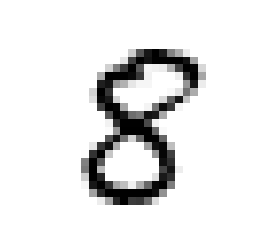

8


In [44]:
%matplotlib inline
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import random

len = mnist.test.images.shape[0]
index = random.randrange(len)
print(index)

adigit = mnist.test.images[index]
adigit_image = adigit.reshape(28,28)

plt.imshow(adigit_image, cmap = matplotlib.cm.binary, interpolation = "nearest")
plt.axis("off")
plt.show()
print(mnist.test.labels[index])

In [45]:
adigit = adigit.reshape(1,784)

In [49]:
with tf.Session() as sess:
    saver.restore(sess, "models/my_model_final.ckpt")
    pred = tf.argmax(logits, 1)
    print(pred.eval(feed_dict = {x: adigit}))

INFO:tensorflow:Restoring parameters from models/my_model_final.ckpt
[8]
